Run fasttext in ~/fastText-0.2.0/sent2vec: ./fasttext sent2vec -input ~/Nikola/clean.train.title.txt -output my_model -minCount 8 -dim 700 -epoch 9 -lr 0.2 -wordNgrams 2 -loss ns -neg 10 -thread 20 -t 0.000005 -dropoutK 4 -minCountLabel 20 -bucket 4000000 -maxVocabSize 750000 -numCheckPoints 10


In [11]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
##nltk.download('punkt')
import sent2vec
import numpy as np

model = sent2vec.Sent2vecModel()
#model.load_model('/home/rich/Downloads/model.bin')
model.load_model('model.bin')
#embs = model.embed_sentences(["first sentence .", "another sentence"])

#embW, vocab = model.get_unigram_embeddings()
#print(len(vocab))
#print(vocab["neuron"])

#embW = model.embed_unigrams(['dog', 'cat'])
#print(tok)
#print(embs)

In [10]:
# %load sent2vec-master/wikiTokenize.py
#!/usr/bin/python3

import sys
from nltk.tokenize import StanfordTokenizer
import re
import os

def tokenize(tknzr, sentence, to_lower=True):
    """Arguments:
        - tknzr: a tokenizer implementing the NLTK tokenizer interface
        - sentence: a string to be tokenized
        - to_lower: lowercasing or not
    """
    sentence = sentence.strip()
    sentence = ' '.join([format_token(x) for x in tknzr.tokenize(sentence)])
    if to_lower:
        sentence = sentence.lower()
    sentence = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))','<url>',sentence) #replace urls by <url>
    sentence = re.sub('(\@ [^\s]+)','<user>',sentence) #replace @user268 by <user>
    filter(lambda word: ' ' not in word, sentence)
    return sentence

def format_token(token):
    """"""
    if token == '-LRB-':
        token = '('
    elif token == '-RRB-':
        token = ')'
    elif token == '-RSB-':
        token = ']'
    elif token == '-LSB-':
        token = '['
    elif token == '-LCB-':
        token = '{'
    elif token == '-RCB-':
        token = '}'
    return token

def tokenize_sentences(tknzr, sentences, to_lower=True):
    """Arguments:
        - tknzr: a tokenizer implementing the NLTK tokenizer interface
        - sentences: a list of sentences
        - to_lower: lowercasing or not
    """
    return [tokenize(tknzr, s, to_lower) for s in sentences]





# fileName = sys.argv[1]

SNLP_TAGGER_JAR = "/home/rich/Downloads/stanford-postagger-2018-10-16/stanford-postagger.jar"


# sentences = []
# with open(fileName, 'r') as fileinput:
#    for line in fileinput:
#        sentences.append(line)

tknzr = StanfordTokenizer(SNLP_TAGGER_JAR, encoding='utf-8')
# s = ' <delimiter> '.join(sentences)
# tokenized_sentences_SNLP = tokenize_sentences(tknzr, [s])
# tokenized_sentences_SNLP = tokenized_sentences_SNLP[0].split(' <delimiter> ')

# for sentence in tokenized_sentences_SNLP:
#     print (sentence)


LookupError: Could not find stanford-postagger.jar jar file at /home/rich/Downloads/stanford-postagger-2018-10-16/stanford-postagger.jar

In [13]:
f=open("/home/rich/Nikola/clean.test.title.txt","r+") 
text =f.read()

tokS=sent_tokenize(text)
#tokS = [tokenize(tknzr, s) for s in tokS]

embS = model.embed_sentences(tokS)

In [ ]:
%ls sent2vec-master/

In [15]:
import numpy as np
import matplotlib.pyplot as plt
#from wikiTokenize import tokenize
%ls

 anaconda3/         fastText-master.zip  'Rich - sent2vec.ipynb'
 Desktop/           model.bin             sent2vec-master/
 Documents/         Music/                sent2vec-master.zip
 Downloads/         Nikola/               Templates/
 examples.desktop   nltk_data/            v0.2.0.zip
 fastText-0.2.0/    Pictures/             Videos/
 fastText-master/   Public/


In [ ]:
tokS[0]

In [38]:
#vocab = model.get_vocabulary() 
#embW, vocab = model.get_unigram_embeddings()
#print(len(embW[7]))


sentence_norms_sent2vec = []
sentence_norms_by_hand = []
word_norms_by_hand = []

for i, sent in enumerate(tokS):
    sentence_norms_sent2vec.append(np.linalg.norm(embS[i]) ** 2)
    sent_tokenized = word_tokenize(sent)
    word_embeddings = []
    word_embeddings_norms = []
    
    for word in sent_tokenized:
        word_emb = model.embed_sentences([word])
        word_embeddings.append(word_emb)
        word_embeddings_norms.append(np.linalg.norm(word_emb) ** 2)
        
#     print(len(word_embeddings))
    sent_embedding = np.sum(word_embeddings, 0)/len(np.nonzero(word_embeddings_norms)[0])
    word_embedding_norm = np.mean(word_embeddings_norms)
    sent_embedding_norm = np.linalg.norm(sent_embedding[0]) ** 2 
    sentence_norms_by_hand.append(sent_embedding_norm)
    word_norms_by_hand.append(word_embedding_norm)

In [43]:
print(len(np.nonzero(word_embeddings_norms)[0]))
dir

13


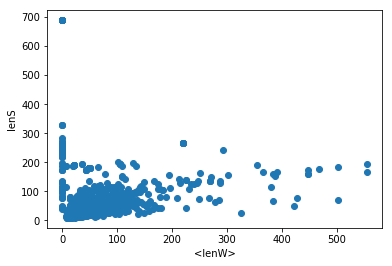

In [46]:
plt.scatter(sentence_norms_sent2vec, sentence_norms_by_hand)
plt.xlabel('<lenW>')
plt.ylabel('lenS')
plt.show()

In [ ]:
print(hh[0])

In [ ]:
plt.scatter(lenS, lenS2)
plt.xlabel('lenS')
plt.ylabel('lenS2')
plt.show()
#print(sentS/len(tokWs))
#rint(embS[i])
#print(len(embS))
print(text)
#print(model.embed_sentences(['Purification']))

In [ ]:
l=[0]*len(embW)
for i in range(len(embW)):
    l[i]=np.linalg.norm(embW[i])
plt.yscale('log')
plt.hist(l,bins=range(70))
plt.show()

In [ ]:
l=[0]*len(embS)
for i in range(len(embS)):
    l[i]=np.linalg.norm(embS[i])
plt.yscale('log')
plt.hist(l,bins=range(70))
plt.show()

In [ ]:
import umap
from sklearn.datasets import load_digits

digits = load_digits()

embedding = umap.UMAP().fit_transform(digits.data)

In [ ]:
plt.scatter(embedding)
plt.show()